In [109]:
import numpy as np
import pandas as pd

In [110]:
df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [113]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

we will perform one-hot-encoding for categorical variables {'geography', 'gender'}

In [114]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [115]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [118]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [119]:

model = Sequential([
    Input(shape=(11,)),
    Dense(11, activation='relu'),
    Dense(11, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [120]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
history = model.fit(X_train_std, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.6414 - loss: 0.6266 - val_accuracy: 0.8019 - val_loss: 0.4804
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8008 - loss: 0.4747 - val_accuracy: 0.8025 - val_loss: 0.4436
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8048 - loss: 0.4380 - val_accuracy: 0.8087 - val_loss: 0.4281
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8040 - loss: 0.4420 - val_accuracy: 0.8163 - val_loss: 0.4180
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8082 - loss: 0.4291 - val_accuracy: 0.8250 - val_loss: 0.4110
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8162 - loss: 0.4260 - val_accuracy: 0.8331 - val_loss: 0.4016
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8336 - loss: 0.3884 - val_accuracy: 0.8413 - val_loss: 0.3906
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8321 - loss: 0.3923 - 

In [123]:
y_pred = model.predict(X_test_std)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


In [124]:
y_pred

array([[0.1000586 ],
       [0.07292081],
       [0.06493811],
       ...,
       [0.03122159],
       [0.05755312],
       [0.58502775]], dtype=float32)

In [130]:
y_pred = (y_pred > 0.5).astype(int)  # threshold 0.5
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [126]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.861

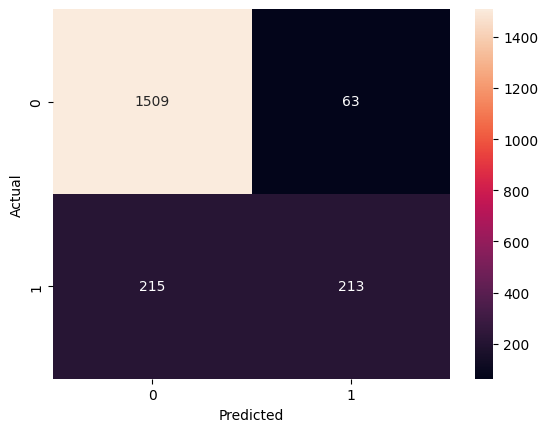

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


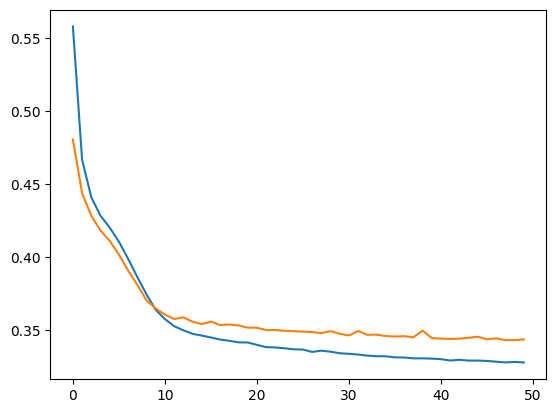

In [128]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

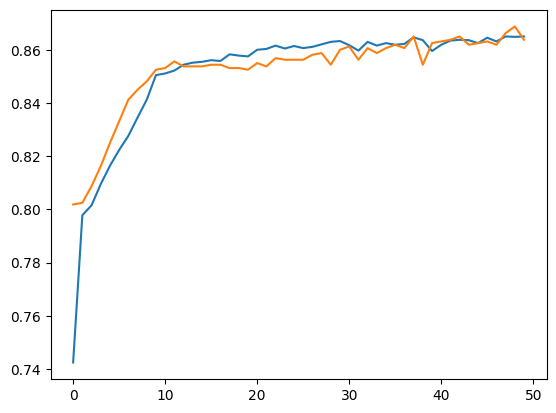

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])